In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Use Aer's AerSimulator

In [2]:
simulator = AerSimulator()

Create a Quantum Circuit acting on the q register

In [3]:
circuit = QuantumCircuit(2, 2)

Add a H gate on qubit 0

In [4]:
circuit.h(0)

Add a CX (CNOT) gate on control qubit 0 and target qubit 1

In [5]:
circuit.cx(0, 1)

Map the quantum measurement to the classical bits

In [6]:
circuit.measure([0, 1], [0, 1])

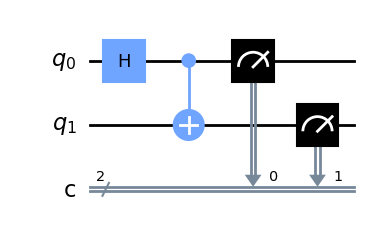

In [7]:
circuit.draw(output='mpl')

Compile the circuit for the support instruction set (basis_gates)<br>
and topology (coupling_map) of the backend

In [7]:
compiled_circuit = transpile(circuit, simulator)

Execute the circuit on the aer simulator

In [8]:
job = simulator.run(compiled_circuit, shots=1000)

Grab results from the job

In [9]:
result = job.result()

Returns counts

In [10]:
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)


Total count for 00 and 11 are: {'00': 536, '11': 464}


Draw the circuit

In [11]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

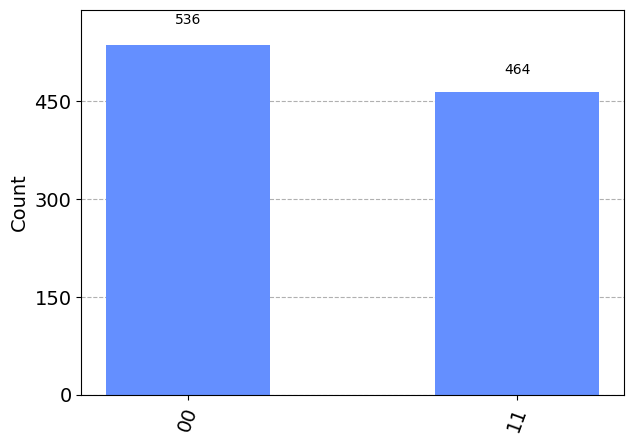

In [12]:
plot_histogram(counts) # |00> and |11> should have equal probability

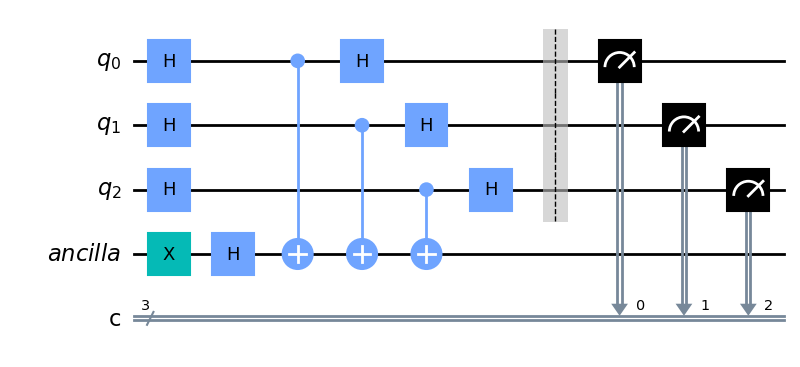

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, anc, cr)

qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure(qr, cr)# |1> -> |0> - |1>

qc.draw('mpl')